### Work challenges faced by developers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from pylab import savefig

In [2]:
df2019 = pd.read_csv('2019 Stack Overflow Survey Responses.csv')
print(df2019.columns)
print(df2019.shape)

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [3]:
drop_list_2019 = ['Respondent','CurrencyDesc', 'FizzBuzz', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'SurveyLength', 'SurveyEase' ]
df2019 = df2019.drop(drop_list_2019, axis=1)
print(df2019.shape)

(88883, 67)


In [4]:
df2019 = df2019.dropna(how="any").reset_index()

In [5]:
for i in range(0, df2019.shape[0]):
    if (df2019.at[i,'WorkRemote'] == "A few days each month" or df2019.at[i,'WorkRemote']== "Less than half the time, but at least one day each week"):
        df2019.at[i,'WorkRemoteNew'] = 'Less than half the time'
    elif(df2019.at[i,'WorkRemote'] =='About half the time' or df2019.at[i,'WorkRemote'] == 'More than half, but not all, the time' ):
        df2019.at[i,'WorkRemoteNew'] = 'Half the time or more'
    elif(df2019.at[i,'WorkRemote'] == "All or almost all the time (I'm full-time remote)"):
        df2019.at[i,'WorkRemoteNew'] = 'Full time remote'
    elif(df2019.at[i,'WorkRemote'] == 'Less than once per month / Never'):
        df2019.at[i,'WorkRemoteNew'] = 'Never'
    else:
        df2019.at[i,'WorkRemoteNew'] = df2019.at[i,'WorkRemote']

In [6]:
for i in range(0, df2019.shape[0]):
    if (df2019.at[i,'WorkRemoteNew'] == "Full time remote" or df2019.at[i,'WorkRemoteNew']== "Half the time or more"):
        df2019.at[i,'WorkRemoteCat'] = 'Remote Work'
    else:
        df2019.at[i,'WorkRemoteCat'] = 'Not Remote'

Create two seperate dataframes for remote and non-remote developers

In [8]:
remote_df = df2019[df2019['WorkRemoteCat']=='Remote Work'].reset_index()
remote_df.shape

(888, 71)

In [9]:
non_remote_df = df2019[df2019['WorkRemoteCat']!='Remote Work'].reset_index()
non_remote_df.shape

(4989, 71)

Count the top 3 challenges listed by each developer and getting them into dataframes

In [10]:
remote_challenge = pd.Series(remote_df.WorkChallenge.str.split(';').sum()).value_counts().rename_axis('Work Challenge').reset_index(name='Counts')
remote_challenge['RemoteWork'] = 'Remote Work'

In [11]:
remote_challenge['Percentage'] = remote_challenge['Counts']/remote_challenge['Counts'].sum()

In [22]:
non_remote_challenge = pd.Series(non_remote_df.WorkChallenge.str.split(';').sum()).value_counts().rename_axis('Work Challenge').reset_index(name='Counts')
non_remote_challenge['RemoteWork'] = 'Not Remote'

In [23]:
non_remote_challenge['Percentage'] = non_remote_challenge['Counts']/non_remote_challenge['Counts'].sum()

Merging remote and non-remote work challenges

In [25]:
df_merge = remote_challenge.append(non_remote_challenge)
df_merge

,Work Challenge,Counts,RemoteWork,Percentage
0,Meetings,379,Remote Work,0.164639
1,Being tasked with non-development work,329,Remote Work,0.142919
2,Distracting work environment,328,Remote Work,0.142485
3,Not enough people for the workload,311,Remote Work,0.135100
4,"Non-work commitments (parenting, school work, ...",268,Remote Work,0.116421
5,Lack of support from management,234,Remote Work,0.101651
6,Toxic work environment,181,Remote Work,0.078627
7,Time spent commuting,149,Remote Work,0.064726
8,Inadequate access to necessary tools,123,Remote Work,0.053432
0,Distracting work environment,2233,Not Remote,0.167781


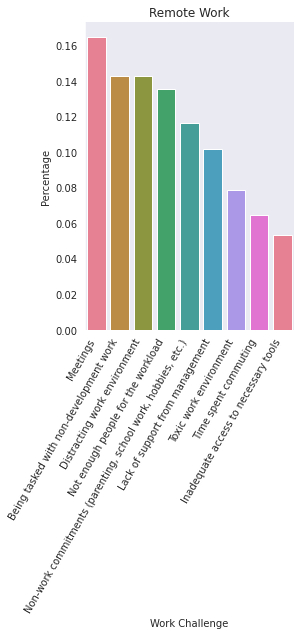

In [42]:
sns.set_style("dark")
ax = sns.catplot(x="Work Challenge", y="Percentage",kind="bar", data=remote_challenge, palette=sns.color_palette("husl", 8))
ax.set_xticklabels( rotation=60, ha="right").set(title='Remote Work')
# plt.tight_layout()
plt.savefig('svm_conf7.png')

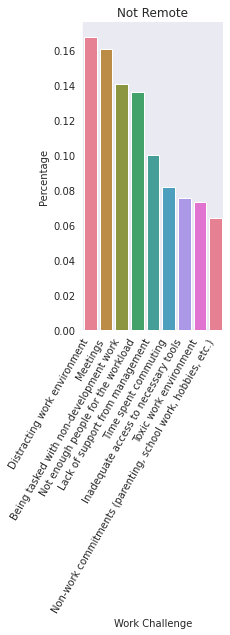

In [43]:
sns.set_style("dark")
ax = sns.catplot(x="Work Challenge", y="Percentage",kind="bar", data=non_remote_challenge, palette=sns.color_palette("husl", 8))
ax.set_xticklabels( rotation=60, ha="right").set(title='Not Remote')
# plt.tight_layout()
plt.savefig('svm_conf8.png')